In [38]:
#######################################################
##              KBO Stat Graph Program               ##
#######################################################

import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/player/?m=year&p_no=10475'
req_headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
    , "Referer":"https://www.google.com/"
}

res = requests.get(
    url,
    headers=req_headers
)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, "lxml")

    # th
    title = []
    title_data = soup.select("table > thead:nth-child(1) > tr:nth-child(1) > th")
    for t in title_data :
        t_data = t.text.replace("\n", ' ')
        if t_data == '비율' :
            t2 = soup.select("table > thead:nth-child(1) > tr:nth-child(2) > th")
            for t_ in t2 :
                title.append(t_.text.replace("\n", ' '))
        else :
            title.append(t.text.replace("\n", ' '))
        
    # 데이터
    stat_data_line = []
    stat_data = []
    datas = soup.select("table > tbody:nth-child(2) > tr > td")
    for i, j in enumerate(datas, start=1) :
        stat_data_line.append(j.text.replace("\n", ' '))
        if i % len(title) == 0 :
            stat_data.append(stat_data_line)
            stat_data_line = []
else:
    print("실패:", res.status_code)

result_df = pd.DataFrame(stat_data, columns=title).set_index('Year')
result_df.to_csv('./ohjihwan.csv')


In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("./ohjihwan.csv").set_index('Year')
df.head(10)

,Team,Age,Pos.,oWAR,dWAR,G,PA,ePA,AB,R,...,GDP,SH,SF,AVG,OBP,SLG,OPS,R/ePA,wRC+,WAR
Year,,,,,,,,,,,,,,,,,,,,,
2009,LG,19,SS,-0.12,0.04,5,10,10,9,1,...,0,0,0,0.111,0.200,0.111,0.311,-0.186,-39.7,-0.08
2010,LG,20,SS,1.68,0.68,125,417,410,352,59,...,1,7,7,0.241,0.332,0.423,0.755,-0.019,93.7,2.35
2011,LG,21,SS,0.01,0.41,63,180,177,156,17,...,2,3,1,0.212,0.299,0.295,0.594,-0.051,61.7,0.42
2012,LG,22,SS,2.25,0.69,133,540,527,462,66,...,6,9,8,0.249,0.331,0.383,0.714,-0.004,102.2,2.94
2013,LG,23,SS,3.04,2.70,124,514,507,441,81,...,7,7,3,0.256,0.347,0.399,0.746,0.005,107.2,5.74
2014,LG,24,SS,2.45,0.41,113,464,457,397,72,...,8,6,3,0.262,0.354,0.413,0.767,0.130,99.1,2.85
2015,LG,25,SS,3.31,0.88,138,566,563,497,76,...,2,3,3,0.278,0.357,0.443,0.800,0.133,107.0,4.19
2016,LG,26,SS,4.29,0.45,121,472,470,393,73,...,7,2,5,0.280,0.387,0.494,0.881,0.170,129.1,4.75
2017,LG,27,SS,2.05,-0.24,107,390,387,334,47,...,8,1,5,0.272,0.362,0.407,0.769,0.130,103.2,1.80


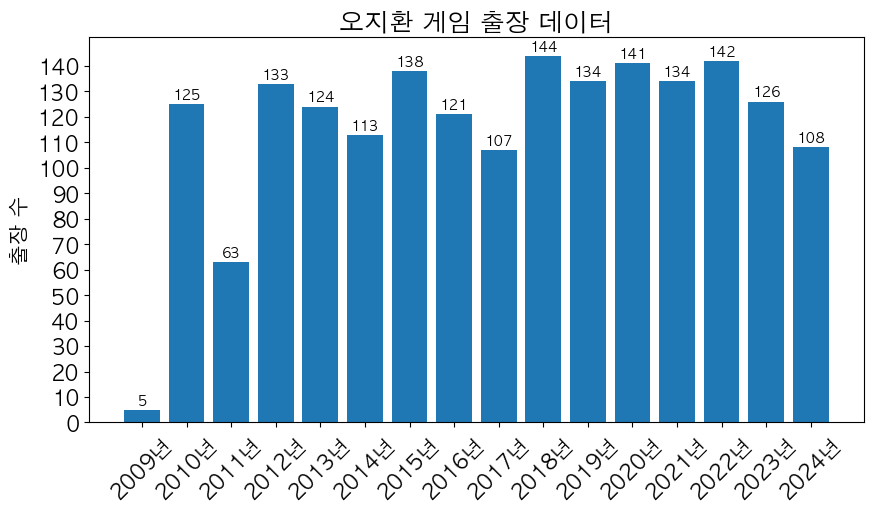

In [40]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 15 # 글자 크기
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))

plt.title('오지환 게임 출장 데이터')
plt.ylabel("출장 수")

plt.xticks(
    df.index,   # 눈금 위치 값들 (iterable 타입)
    labels=[str(v)+"년" for v in df.index],  # 눈금의 label
    rotation=45 # label을 몇도 회전시킬지
)
plt.yticks(range(0, 144, 10))

plt.bar(df.index, df['G'])

for i, g in enumerate(df['G']):
    plt.text(df.index[i], g+2, g, fontsize=10, ha='center')
plt.show()

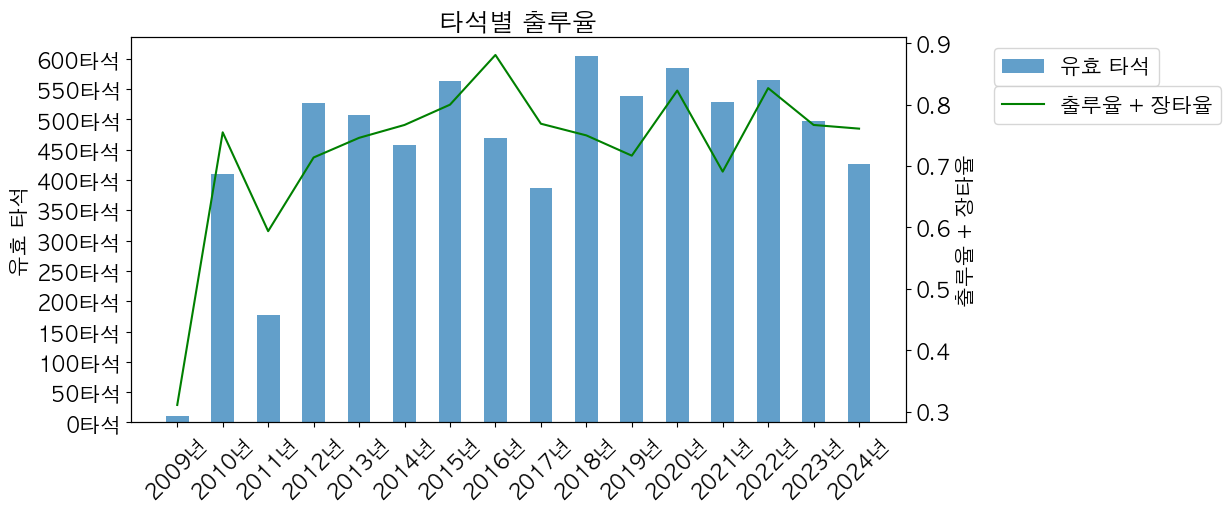

In [41]:
plt.figure(figsize=(10, 5))
plt.title('타석별 출루율')

plt.xticks(
    df.index,   # 눈금 위치 값들 (iterable 타입)
    labels=[str(v)+"년" for v in df.index],  # 눈금의 label
    rotation=45
)
plt.yticks(
    ticks=range(0, 700, 50),   # 눈금 위치 값들 (iterable 타입)
    labels=[str(v)+"타석" for v in range(0, 700, 50)]  # 눈금의 label
)

ax1 = plt.gca() # 왼쪽 y
ax2 = ax1.twinx() 

ax1.bar(df.index, df['ePA'], label='유효 타석', width=0.5, alpha=0.7)
ax2.plot(df.index, df['OPS'], label='출루율 + 장타율', color='g')

ax1.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
ax2.legend(bbox_to_anchor=(1.1, 0.9), loc="upper left")
ax1.set_ylabel("유효 타석")
ax2.set_ylabel("출루율 + 장타율")

plt.show()

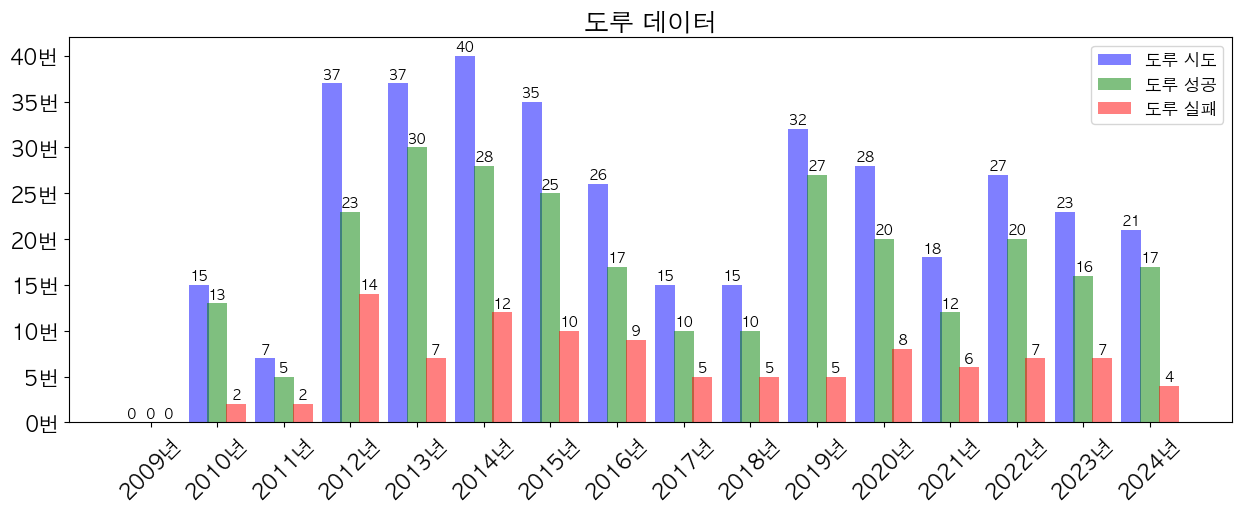

In [158]:
steal_base_try = df['SB'] + df['CS']
df['도루시도'] = steal_base_try

plt.figure(figsize=(15, 5))
plt.title('도루 데이터')

plt.xticks(
    df.index,   # 눈금 위치 값들 (iterable 타입)
    labels=[str(v)+"년" for v in df.index],  # 눈금의 label
    rotation=45
)

plt.yticks(
    range(0, 45, 5),
    labels=[str(v)+"번" for v in range(0, 45, 5)]
)

plt.bar(df.index - 0.28, (df['SB'] + df['CS']), label='도루 시도', color='b', width=0.3, alpha=0.5)
plt.bar(df.index, (df['SB']), label='도루 성공', color='g', width=0.3, alpha=0.5)
plt.bar(df.index + 0.28, (df['CS']), label='도루 실패', color='r', width=0.3, alpha=0.5)

for i, j in enumerate((df['SB'] + df['CS'])):
    plt.text(df.index[i] - 0.28, j+0.5, j, fontsize=10, ha='center')
    
for i, j in enumerate((df['SB'])):
    plt.text(df.index[i], j+0.5, j, fontsize=10, ha='center')
    
for i, j in enumerate((df['CS'])):
    plt.text(df.index[i] + 0.28, j+0.5, j, fontsize=10, ha='center')

plt.legend(fontsize=12)

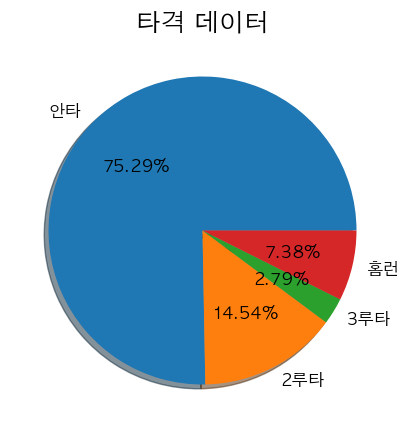

In [186]:
plt.figure(figsize=(15, 5))
plt.title('타격 데이터')

data = [df['H'].sum(), df['2B'].sum(), df['3B'].sum(), df['HR'].sum()]

plt.pie(data, 
        labels = ['안타', '2루타', '3루타', '홈런'],
        autopct='%.2f%%',   # 각  pie의 비율 값을 출력. 출력 format을 %타입 placeholder이용. %f: 실수, %d: 정수, %%: %
        explode=[0, 0, 0, 0],  # 공간 띄우기 (강조하고 싶은 부분)
        shadow=True,
        textprops={'fontsize': 12}
   )  

plt.show()

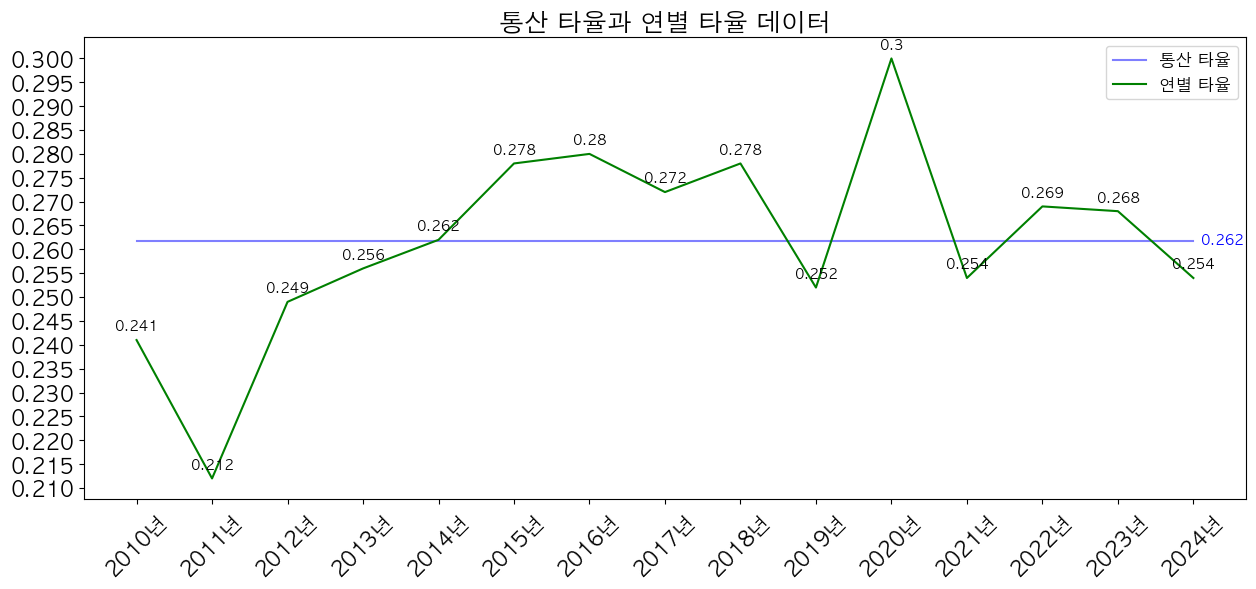

In [320]:
plt.figure(figsize=(15, 6))
plt.title('통산 타율과 연별 타율 데이터')

plt.xticks(
    df.index[1:],   # 눈금 위치 값들 (iterable 타입)
    labels=[str(v)+"년" for v in df.index[1:]],  # 눈금의 label
    rotation=45
)
plt.yticks(np.arange(0.2, 0.4, 0.005))

total_avg = [df[1:]['AVG'].sum() / (len(df.index) -1)] * (len(df.index) -1)

plt.plot(df.index[1:], total_avg, label='통산 타율', color='b', alpha=0.5)
plt.plot(df.index[1:], df[1:]['AVG'], label='연별 타율', color='g')

plt.text(2024.1, 0.2612, round(total_avg[0], 3), fontsize=10, color='b')
    
for i, j in enumerate(df[1:]['AVG'], start=1):
    plt.text(df.index[i], j+0.002, round(j,3), fontsize=10, ha='center')

plt.legend(fontsize=12)

In [326]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://statiz.sporki.com/player/?m=year&p_no=13934'
req_headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
    , "Referer":"https://www.google.com/"
}

res = requests.get(
    url,
    headers=req_headers
)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, "lxml")

    # th
    title = []
    title_data = soup.select("table > thead:nth-child(1) > tr:nth-child(1) > th")
    for t in title_data :
        t_data = t.text.replace("\n", ' ')
        if t_data == '비율' :
            t2 = soup.select("table > thead:nth-child(1) > tr:nth-child(2) > th")
            for t_ in t2 :
                title.append(t_.text.replace("\n", ' '))
        else :
            title.append(t.text.replace("\n", ' '))
        
    # 데이터
    stat_data_line = []
    stat_data = []
    datas = soup.select("table > tbody:nth-child(2) > tr > td")
    for i, j in enumerate(datas, start=1) :
        stat_data_line.append(j.text.replace("\n", ' '))
        if i % len(title) == 0 :
            stat_data.append(stat_data_line)
            stat_data_line = []
    
else:
    print("실패:", res.status_code)

result_df = pd.DataFrame(stat_data, columns=title).set_index('Year')
result_df.to_csv('./kelly.csv')

In [327]:
import pandas as pd
import numpy as np

df = pd.read_csv("./kelly.csv").set_index('Year')
df.head(10)

,Team,Age,Pos.,G,GS,GR,GF,CG,SHO,W,...,SO,ROE,BK,WP,ERA,RA9,rRA9,FIP,WHIP,WAR
Year,,,,,,,,,,,,,,,,,,,,,
2019,LG,30,P,29,29,0,0,0,0,14,...,126,8,0,12,2.55,3.49,3.49,3.50,1.14,4.84
2020,LG,31,P,28,28,0,1,1,1,15,...,134,5,0,4,3.32,3.48,3.48,4.07,1.15,5.84
2021,LG,32,P,30,30,0,0,0,0,13,...,142,7,1,7,3.15,3.25,3.21,3.76,1.24,5.89
2022,LG,33,P,27,27,0,0,0,0,16,...,153,5,0,3,2.54,2.71,2.71,2.89,1.08,6.14
2023,LG,34,P,30,30,0,0,0,0,10,...,129,7,0,6,3.83,4.38,4.13,3.49,1.24,3.93
2024,LG,35,P,19,19,0,2,2,1,5,...,69,4,0,9,4.51,5.15,5.15,4.89,1.37,2.20


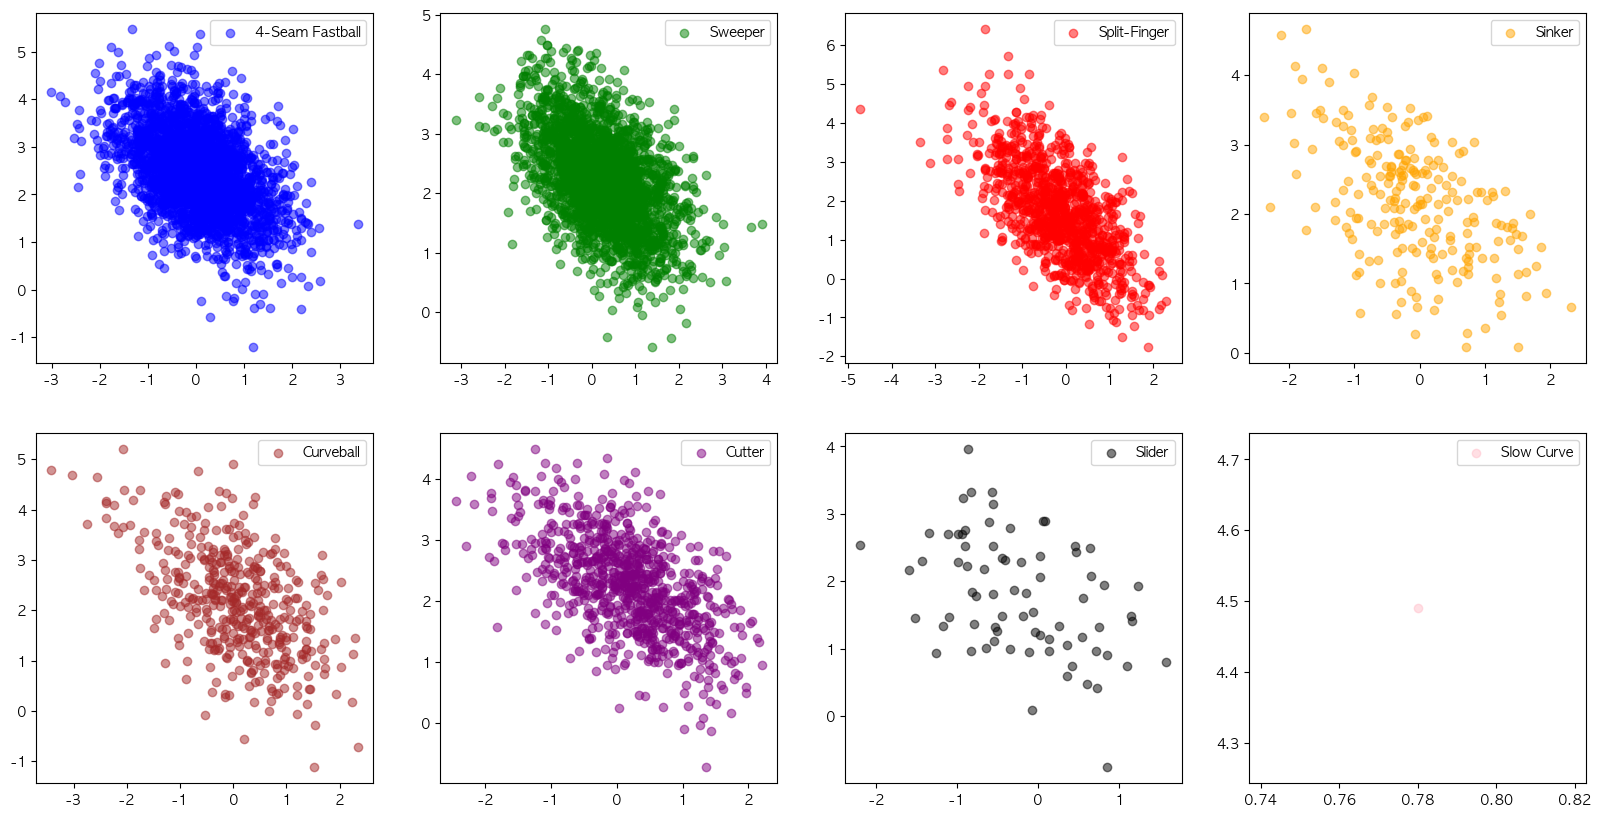

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./ohtani_shohei.csv")
df.dropna(subset=['pitch_name'], inplace=True) # 결측치 제거

plt.figure(figsize=(20, 10))
pitch = df['pitch_name'].unique()
color = ['blue', 'green', 'red', 'orange', 'brown', 'purple', 'black', 'pink']

for i, p in enumerate(pitch, start=1) :
    plt.subplot(2, 4, i)
    df_sw = df.query('pitch_name == "'+str(p)+'"')
    plt.scatter(df_sw['plate_x'],  # x축에 들어갈 값
                df_sw['plate_z'],  # y축에 들어갈 값. x, y의 같은 index 위치에 점을 찍는다.
                alpha=0.5,
                c=color[i-1]
               )
    plt.legend([p])
plt.show()

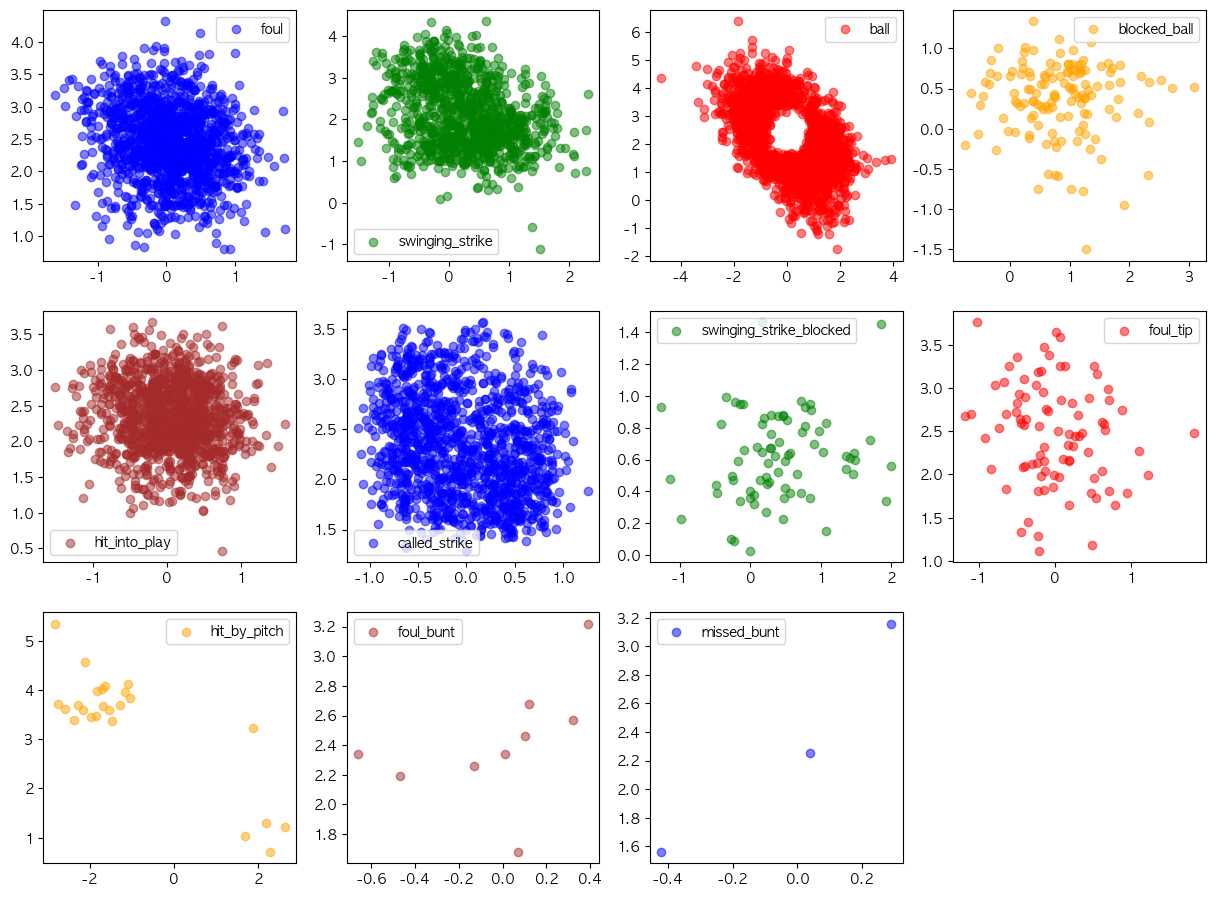

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./ohtani_shohei.csv")
df.dropna(subset=['pitch_name'], inplace=True) # 결측치 제거

plt.figure(figsize=(15, 15))
pitch = df['description'].unique()
color = ['blue', 'green', 'red', 'orange', 'brown', 'blue', 'green', 'red', 'orange', 'brown','blue', 'green', 'red', 'orange', 'brown']

for i, p in enumerate(pitch, start=1) :
    plt.subplot(4, 4, i)
    df_sw = df.query('description == "'+str(p)+'"')
    plt.scatter(df_sw['plate_x'],  # x축에 들어갈 값
                df_sw['plate_z'],  # y축에 들어갈 값. x, y의 같은 index 위치에 점을 찍는다.
                alpha=0.5,
                c=color[i-1]
               )
    plt.legend([p])
plt.show()